# MetOffice

[MetOffice](https://www.metoffice.gov.uk) is the United Kingdom (UK) national weather service. It provides a [DataPoint API](https://www.metoffice.gov.uk/services/data/datapoint) with access to a range of data including observations, forecasts, climate averages, and weather warnings. The API is free to use but [the free tier is limited to 5000 requests per day, and 100 requests per minute](https://www.metoffice.gov.uk/services/data/datapoint/terms-and-conditions---datapoint). The ["Getting Started" guide](https://www.metoffice.gov.uk/services/data/datapoint/getting-started) describes the steps required to get an API key.

Let us now use the `MetOffice` class by instantiating it with the API key and the region of interest (which must be a part of the UK so that it contains stations).

In [ ]:
from meteostations.clients import MetOfficeClient

API_KEY = "<your-api-key>"
region = "Highland"

client = MetOfficeClient(region, API_KEY)


Once instantiated, the `stations_gdf` property features the stations within the region, with its locations and other attributes:

In [ ]:
client.stations_gdf

,elevation,id,latitude,longitude,name,region,unitaryAuthArea,obsSource,nationalPark,geometry
2,36.0,3075,58.454,-3.089,Wick John O Groats Airport,he,Highland,LNDSYN,NaN,POINT (-3.08900 58.45400)
7,11.0,3034,57.859,-5.636,Aultbea,he,Highland,NaN,NaN,POINT (-5.63600 57.85900)
8,18.0,3037,57.257,-5.809,Skye/Lusa,he,Highland,LNDSYN,NaN,POINT (-5.80900 57.25700)
9,81.0,3044,58.288,-4.442,Altnaharra Saws,he,Highland,NaN,NaN,POINT (-4.44200 58.28800)
10,237.0,3047,56.867,-4.708,Tulloch Bridge,he,Highland,NaN,NaN,POINT (-4.70800 56.86700)
45,228.0,3063,57.206,-3.827,Aviemore,he,Highland,NaN,Cairngorms National Park,POINT (-3.82700 57.20600)
92,265.0,3031,57.725,-4.896,Loch Glascarnoch,he,Highland,NaN,NaN,POINT (-4.89600 57.72500)
93,773.0,3039,57.4175,-5.689,Bealach Na Ba,he,Highland,NaN,NaN,POINT (-5.68900 57.41750)
115,1130.0,3041,56.822,-4.97,Aonach Mor Summit,he,Highland,NaN,NaN,POINT (-4.97000 56.82200)



Similarly, the `variables_df` property features the available variables and its metadata:

In [ ]:
client.variables_df.head()

,name,units,$
0,G,mph,Wind Gust
1,T,C,Temperature
2,V,m,Visibility
3,D,compass,Wind Direction
4,S,mph,Wind Speed



Given a variable, the time seres data frame of measurements of the latest 24 hours in the corresponding stations can be obtained with the `get_ts_df` method as in:

In [ ]:
variable = "temperature"

ts_df = client.get_ts_df(variable)
ts_df

,6,7,8,9,10,11,16
time,,,,,,,
2023-07-25 12:00:00+00:00,6.6,7.6,6.6,6.8,5.6,9.8,7.6
2023-07-25 13:00:00+00:00,9.1,9.3,6.9,9.2,8.1,10.4,7.2
2023-07-25 14:00:00+00:00,9.5,11.6,6.9,8.9,10.0,10.8,7.9
2023-07-25 15:00:00+00:00,10.2,11.9,7.4,11.1,12.0,11.1,10.5
2023-07-25 16:00:00+00:00,10.1,12.5,7.8,11.4,12.9,11.7,11.2
2023-07-25 17:00:00+00:00,10.8,12.8,7.3,11.7,13.0,13.3,12.5
2023-07-25 18:00:00+00:00,11.7,13.1,8.0,12.2,13.0,12.7,12.5
2023-07-25 19:00:00+00:00,12.8,13.9,7.3,13.0,12.7,13.6,13.8
2023-07-25 20:00:00+00:00,12.8,13.9,7.3,13.5,12.7,14.5,14.4



The variable argument can be either:

- a MetOffice variable code (string) - see the ["Rep" section of the DataPoint documentation](https://www.metoffice.gov.uk/services/data/datapoint/uk-observations-detailed-documentation) for the list of available variables and their codes.
- or an essential climate variable (ECV) following the meteostations-geopy nomenclature (string).

The returned object is a pandas data frame upon which we can operate using any of its supported functions, e.g.:

<Axes: xlabel='time'>

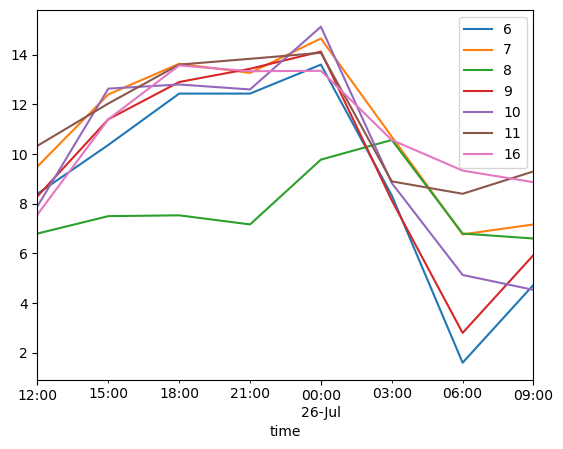

In [ ]:
ts_df.resample("3H").mean().plot()